<a href="https://colab.research.google.com/github/sr606/Python-Practice/blob/main/Walmart_Confidence_Interval_and_CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Business Case: Walmart - Confidence Interval and CLT**

About Walmart:

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


…customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [1]:
#Import the libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read the Walmart data:

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Scaler/walmart_data.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [4]:
#checking null values:

df.isnull().sum()/len(df)*100

,0
User_ID,0.0
Product_ID,0.0
Gender,0.0
Age,0.0
Occupation,0.0
City_Category,0.0
Stay_In_Current_City_Years,0.0
Marital_Status,0.0
Product_Category,0.0
Purchase,0.0


No null values found

In [5]:
#checking characteristics of data:
df.describe(include = 'all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


Initial Observations:



1.   There are no missing values

2.   There are 3631 unique product IDs in dataset.  is the most sold Product Id.


3.   There 7 unique age groups and most purchase belongs to 26-35 group.



4. There are 3 unique city vcategories with category B being the highest.

5. Difference between min and 25th quartile seems to be significant for purchase that suggests outliers in the data.

6. Minimum & Maximum purchase is 12 and 23961 suggests the purchasing behaviour is quite spread over a aignificant range of values. Mean is 9264 and 75% of purchase is of less than or equal to 12054. It suggest most of the purchase is not more than 12k.


7. Few categorical variable are of integer data type. It can be converted to character type.


8.  Standard deviation for purchase have significant value which suggests data is more spread out for this attribute.


In [9]:
columns = ['User_ID','Occupation','Marital_Status','Product_Category']
df[columns] = df[columns].astype('object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  object
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 42.0+ MB


In [11]:
df.describe(include = 'all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068.0,550068,550068,550068,550068.0,550068,550068,550068.0,550068.0,550068.000000
unique,5891.0,3631,2,7,21.0,3,5,2.0,20.0,NaN
top,1001680.0,P00265242,M,26-35,4.0,B,1,0.0,5.0,NaN
freq,1026.0,1880,414259,219587,72308.0,231173,193821,324731.0,150933.0,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9263.968713
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5023.065394
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5823.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8047.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12054.000000


Observation post modifying the categorical variable's data type:

1. There are 5891 unique users, and userid 1001680 being with the highest count.
2. The customers belongs to 21 distinct occupation for the purchases being made with Occupation 4 being the highest.
3. Marital status unmarried contribute more in terms of the count for the purchase.
4. There are 20 unique product categories with 5 being the highest.

In [13]:
# Checking how categorical variables contributes to the entire data
categ_cols = ['Gender', 'Age','City_Category','Stay_In_Current_City_Years','Marital_Status']
df[categ_cols].melt().groupby(['variable', 'value'])[['value']].count()/len(df)

value
variable                   value          
Age                        0-17   0.027455
                           18-25  0.181178
                           26-35  0.399200
                           36-45  0.199999
                           46-50  0.083082
                           51-55  0.069993
                           55+    0.039093
City_Category              A      0.268549
                           B      0.420263
                           C      0.311189
Gender                     F      0.246895
                           M      0.753105
Marital_Status             0      0.590347
                           1      0.409653
Stay_In_Current_City_Years 0      0.135252
                           1      0.352358
                           2      0.185137
                           3      0.173224
                           4+     0.154028

###**Observations:**

1. 40% of the purchase done by aged 26-35 and 78% purchase are done by the customers aged between the age 18-45 (40%: 26-35, 18%: 18-25, 20%: 36-45)
2. 75% of the purchase count are done by Male and 25% by Female
3. 60% Single, 40% Married contributes to the purchase count.
4. 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
5. There are 20 product categories in total.
6. There are 20 different types of occupations in the city.

In [15]:
#checking marital status of diffrent users

df2=df.groupby(['User_ID'])['Marital_Status'].unique()
df2.value_counts()/len(df2)

,count
Marital_Status,
[0],0.580037
[1],0.419963


Observation:
    1. We have 58% of the single users and 42% of married users. Combining with previous observation, single users contributes more as 58% of the single contributes to the 60% of the purchase count.

In [16]:
#Checking the age group distribution in different city categories
pd.crosstab(index=df["City_Category"],columns=df["Age"],margins=True,normalize="index")

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
City_Category,,,,,,,
A,0.017222,0.186400,0.499222,0.180185,0.051496,0.041288,0.024188
B,0.023511,0.187076,0.396171,0.205898,0.088272,0.076743,0.022330
C,0.041612,0.168705,0.316974,0.209131,0.103333,0.085649,0.074596
All,0.027455,0.181178,0.399200,0.199999,0.083082,0.069993,0.039093


###**Observation:**

1. We have seen earlier that city category B and A constitutes less percentage of total population, but they contribute more towards purchase count. We can see from above results large percentage of customers aged 26-35 for B(40%) and A (50%) which can be the reason for these city categories to be more actively purchasing.


In [17]:
#Checking how genders are contributing towards toatl purchase amount
df2=pd.DataFrame(df.groupby(['Gender'])[['Purchase']].sum())

df2['percent'] = (df2['Purchase'] /
                  df2['Purchase'].sum()) * 100
df2

,Purchase,percent
Gender,,
F,1186232642,23.278576
M,3909580100,76.721424


Observation:

1. We can see male(72% of the population) contributes to more than 76% of the total purchase amount whereas female(28% of the population) contributes 23% of the total purchase amount.

In [19]:
#checking how purchase value are spread among different age categories

df2 = pd.DataFrame(df.groupby(['Age'])[['Purchase']].sum())

df2['percent'] = (df2['Purchase'])/(df2['Purchase'].sum())* 100

df2

,Purchase,percent
Age,,
0-17,134913183,2.647530
18-25,913848675,17.933325
26-35,2031770578,39.871374
36-45,1026569884,20.145361
46-50,420843403,8.258612
51-55,367099644,7.203947
55+,200767375,3.939850


In [20]:
# Users with highest no. of purchases

df.groupby(['User_ID'])['Purchase'].count().nlargest(10)

,Purchase
User_ID,
1001680,1026
1004277,979
1001941,898
1001181,862
1000889,823
1003618,767
1001150,752
1001015,740
1005795,729


In [21]:
# Users with highest purchases amount
df.groupby('User_ID')['Purchase'].sum().nlargest(10)

,Purchase
User_ID,
1004277,10536909
1001680,8699596
1002909,7577756
1001941,6817493
1000424,6573609
1004448,6566245
1005831,6512433
1001015,6511314
1003391,6477160


####**Observation:**

1. The users with high number of purchases contribute more to the purchase amount. Still, we can see there are few users not in the list of top 10 purchase counts are there in list of top 10 purchase amount. Also, the user 1004277 with lesser purchase count(979) has a much higher purchase amount than the user(1001680) with top purchase count

In [22]:
df2 = pd.DataFrame(df.groupby(['Occupation'])[['Purchase']].sum())

df2['percent'] = (df2['Purchase'])/ (df2['Purchase'].sum()) * 100

df2

,Purchase,percent
Occupation,,
0,635406958,12.469198
1,424614144,8.332609
2,238028583,4.671062
3,162002168,3.179123
4,666244484,13.074352
5,113649759,2.230258
6,188416784,3.697482
7,557371587,10.937835
8,14737388,0.289206


####**Observations:**

1. Some of the Occupation like 0, 4, 7 has contributed more towards total purchase amount.

##**Univariate Analysis:**

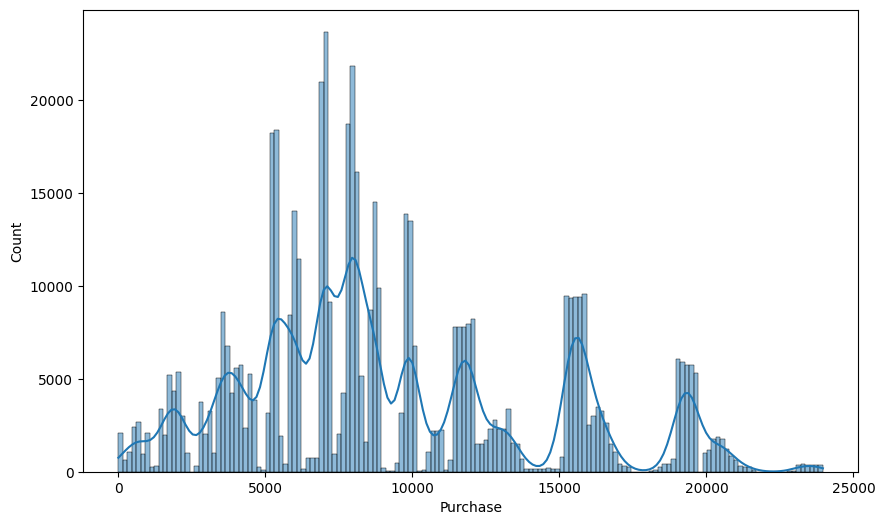

In [24]:
plt.figure(figsize= (10,6))
sns.histplot(data = df, x = 'Purchase', kde = True)
plt.show()

1. We can see purchase value between 5000 and 10000 have higher count. From the initial observation we have already seen the mean and median is 9263 and 8047 respectively. Also, we can see there are outliers in the data.

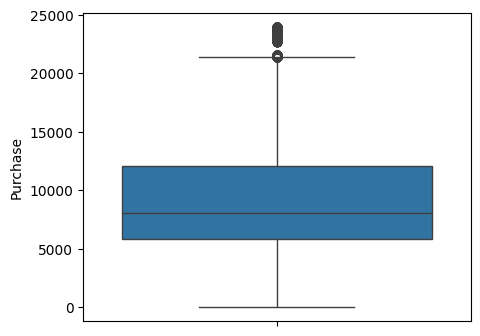

In [25]:
plt.figure(figsize=(5, 4))
sns.boxplot(data=df, y='Purchase')
plt.show()

 We can see there are outliers in the data for purchase.

####**Univariate analysis for qualitative variables:**

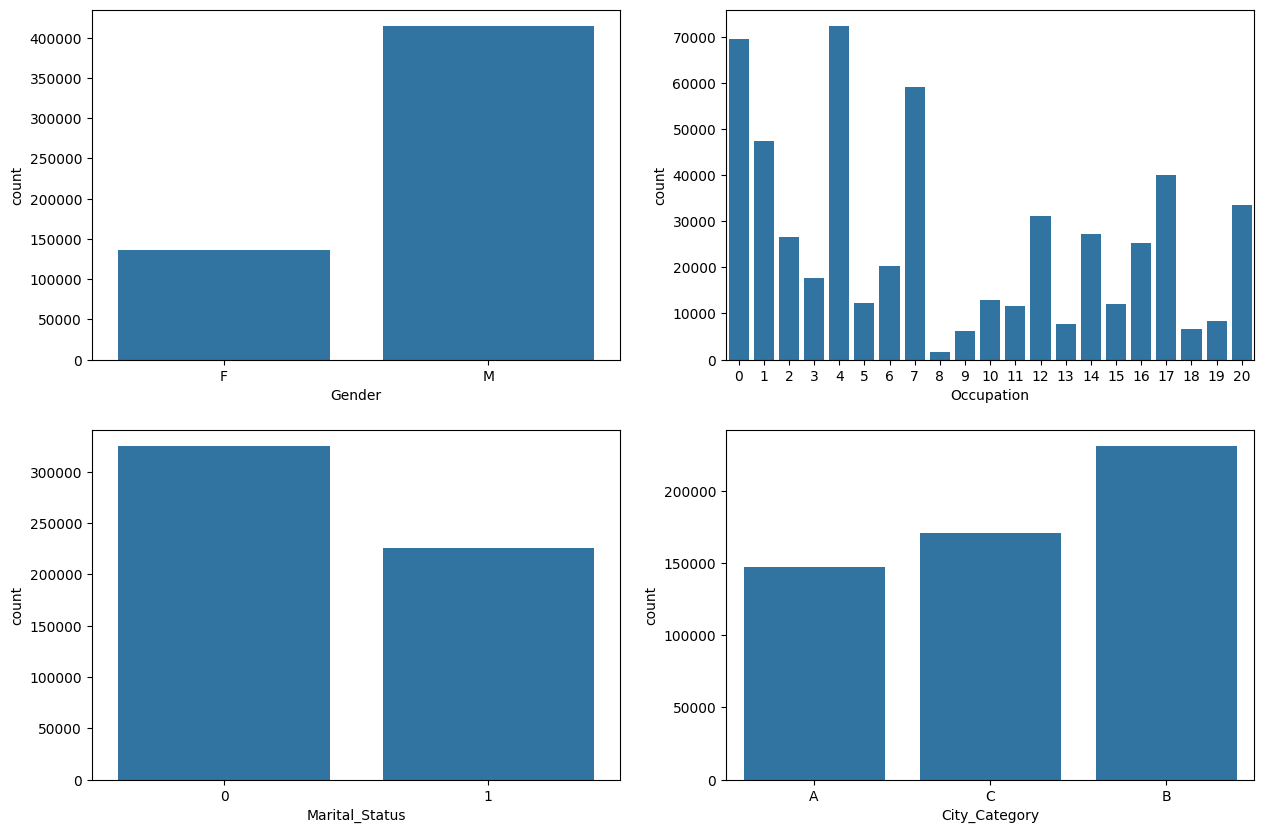

In [27]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize= (15,10))
sns.countplot(data = df, x = 'Gender', ax = axs[0,0])
sns.countplot(data = df, x = 'Occupation', ax = axs[0,1])
sns.countplot(data = df, x = 'Marital_Status', ax = axs[1,0])
sns.countplot(data = df, x = 'City_Category', ax = axs[1,1])
plt.show()

####**Observations:**

    
    1. We can clearly see from the graphs above the purchases done by males are much higher than females.
    2. We have 21 occupations categories. Occupation category 4, 0, and 7 are with higher number of purchases and category 8 with the lowest number of purchaes.
    3. The purchases are highest from City category B.
    4. Single customer purchases are higher than married users.

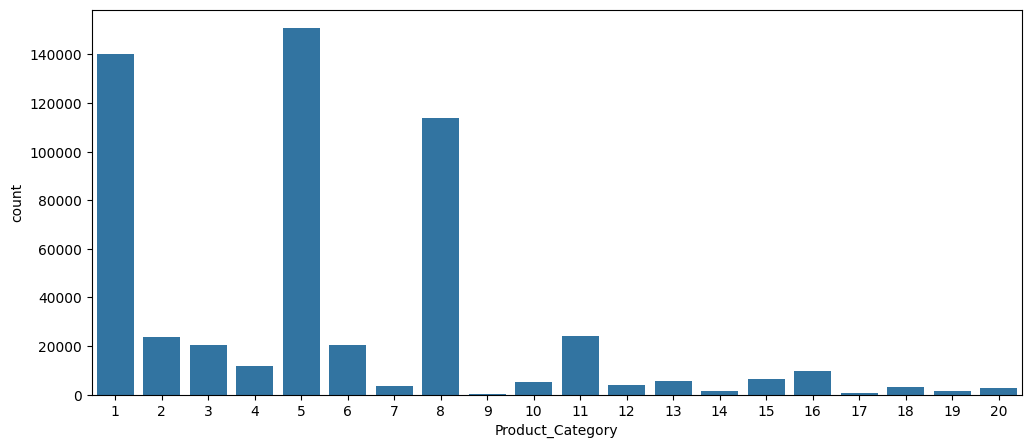

In [28]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Product_Category')
plt.show()

1. There are 20 product categories with product category 1, 5 and  8 having higher purchasing frequency.

##**Bivariate Ananlysis:**

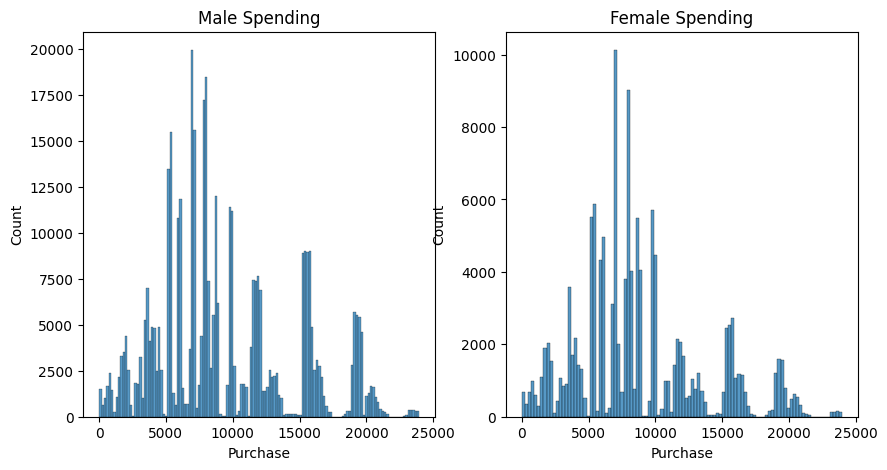

In [30]:
fig, axs = plt.subplots(nrows = 1, ncols= 2, figsize=(10,5))
sns.histplot(data = df[df['Gender'] == 'M']['Purchase'], ax = axs[0]).set_title("Male Spending")
sns.histplot(data = df[df['Gender'] == 'F']['Purchase'], ax = axs[1]).set_title('Female Spending')
plt.show()

From the above histplot, we can clearly see spending behaviour is very much similar in nature for both males and females as the maximum purchase count are between the purchase value range of 5000-10000 for both. But, the purchase count are more in case of males.